In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [88]:
#loading the raw dataset
data1 = pd.read_csv('/Users/arafin/Desktop/thesis /data set/archive/oasis_longitudinal.csv')

In [89]:
#showing the data set
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [90]:
#Change the name of a header 
data1.rename(columns ={'M/F':'Gender'},inplace = True )

In [91]:
#check the types of the variable
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [92]:
#Datacleaing 

In [93]:
# ckeaking duplicated data 
sum(data1.duplicated())

0

In [94]:
#finding null values and show them 
null_columns=data1.columns[data1.isnull().any()]
data1[null_columns].isnull().sum()

SES     19
MMSE     2
dtype: int64

In [95]:
#filling the missing value with mean 
data1["SES"].fillna(data1["SES"].mean(), inplace=True)
data1["MMSE"].fillna(data1["MMSE"].mean(), inplace=True)

# EXPLORATORY DATA ANALYSIS

# Statistical Data Analysis 

In [46]:
#get information about the data
data1.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.104665,3.673329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<AxesSubplot:xlabel='Age', ylabel='Density'>

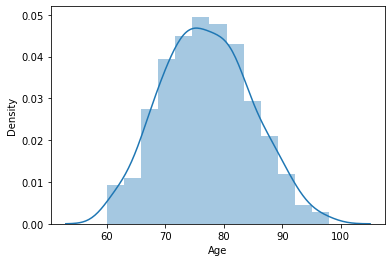

In [21]:
sns.distplot(data1['Age'])

<AxesSubplot:xlabel='EDUC', ylabel='Density'>

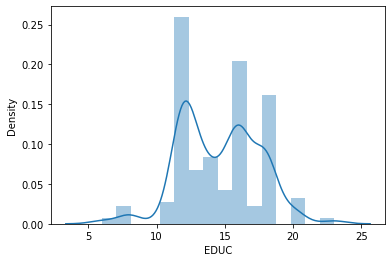

In [26]:
sns.distplot(data1['EDUC'])

<AxesSubplot:xlabel='MMSE', ylabel='Density'>

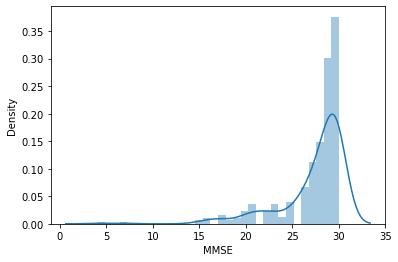

In [27]:
sns.distplot(data1['MMSE'])

<AxesSubplot:xlabel='CDR', ylabel='Density'>

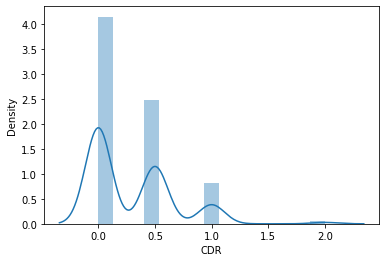

In [28]:
sns.distplot(data1['CDR'])

<AxesSubplot:xlabel='eTIV', ylabel='Density'>

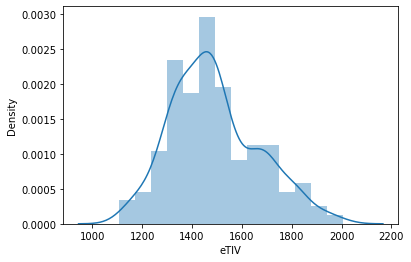

In [29]:
sns.distplot(data1['eTIV'])

<AxesSubplot:xlabel='nWBV', ylabel='Density'>

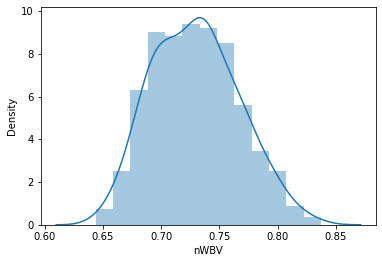

In [32]:
sns.distplot(data1['nWBV'])

# BOX plot 

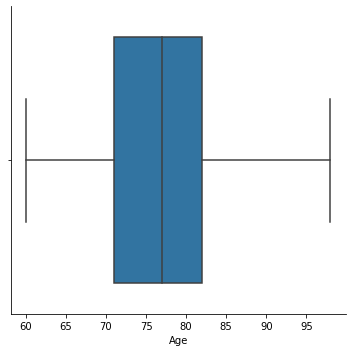

In [33]:
sns.catplot(x='Age', kind='box', data=data1)

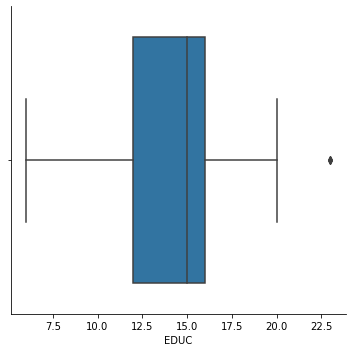

In [34]:
sns.catplot(x='EDUC', kind='box', data=data1)

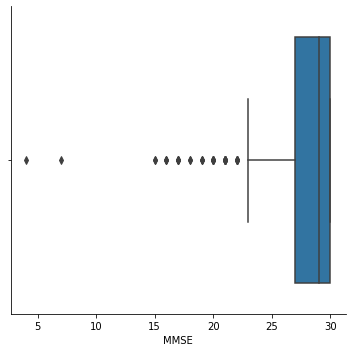

In [35]:
sns.catplot(x='MMSE', kind='box', data=data1)

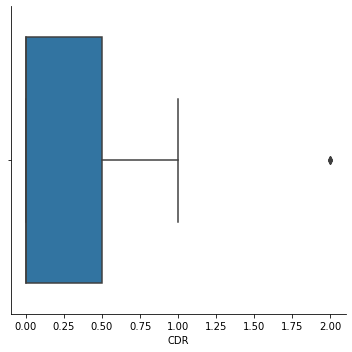

In [36]:
sns.catplot(x='CDR', kind='box', data=data1)

[Text(0, 0, '72'), Text(0, 0, '64'), Text(0, 0, '14')]

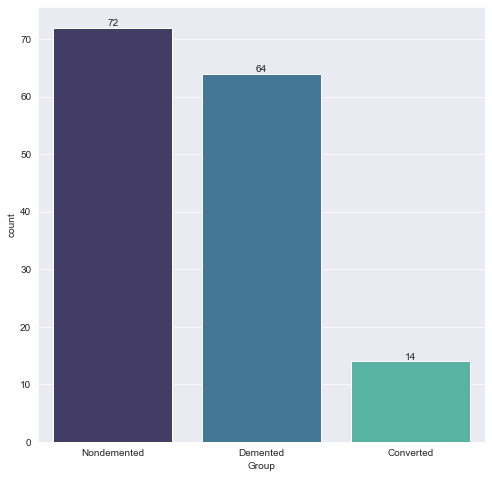

In [97]:
## People count 
sns.set_style('darkgrid')
singledata = data1.loc[data1['Visit']== 1]
dc=sns.countplot(x='Group', data=singledata , palette ="mako")
dc.bar_label(dc.containers[0])


[Text(0, 0, '72'), Text(0, 0, '78')]

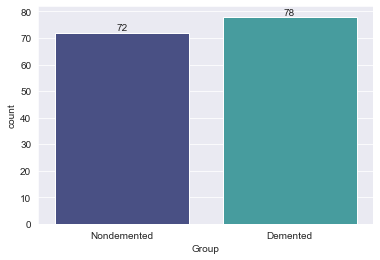

In [48]:
# count of nondemented and demented people 
singledata['Group'] = singledata['Group'].replace(['Converted'], ['Demented'])
data1['Group'] = data1['Group'].replace(['Converted'], ['Demented'])
data2=sns.countplot(x='Group', data=singledata , palette ='mako')
data2.bar_label(data2.containers[0])

# Male vs Female 

[Text(0, 0, '62'), Text(0, 0, '88')]

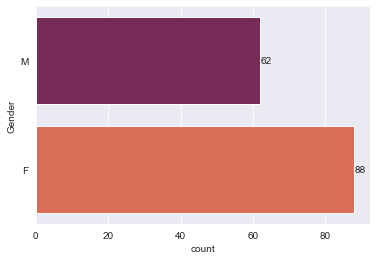

In [49]:
data3=sns.countplot(y='Gender',data=singledata , palette ="rocket")
data3.bar_label(data3.containers[0])

In [50]:
#cheking updated data 
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


# male demented vs female demented 

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

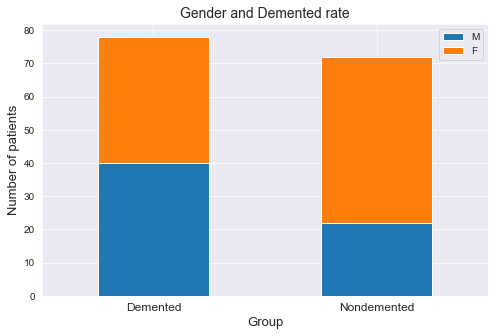

In [51]:
# bar drawing function
def bar_chart(feature):
    Demented = singledata[singledata['Group']=='Demented'][feature].value_counts()
    Nondemented = singledata[singledata['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5) )
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('Gender')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

# Dementia vs education

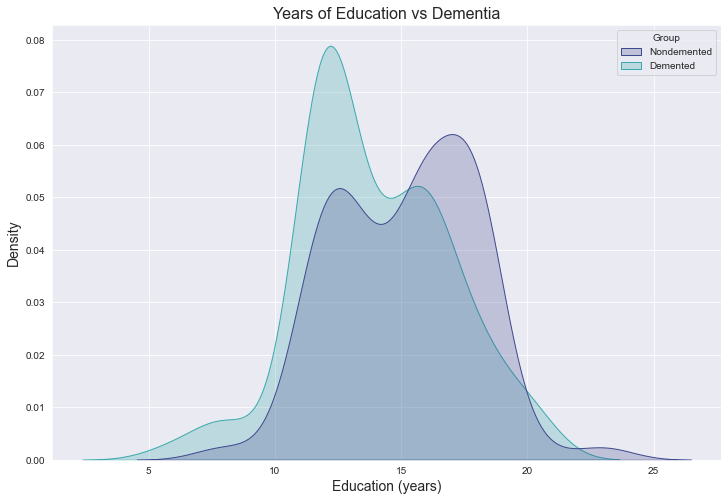

In [24]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='EDUC', shade=True, hue='Group', data=singledata, palette="mako")
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

In [25]:

#Demented patients were less educated in terms of years of education. #better sample and increasing trend 

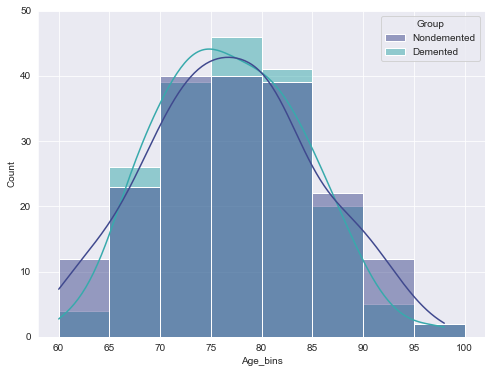

In [26]:
#better sample and increasing trend 
plt.figure ( figsize= (8,6) )
sns.histplot( data=data1, x="Age", binwidth=5, kde=True, hue="Group", palette="mako")
plt.xlabel ('Age_bins' )
plt.ylim(0,50)
plt.show()

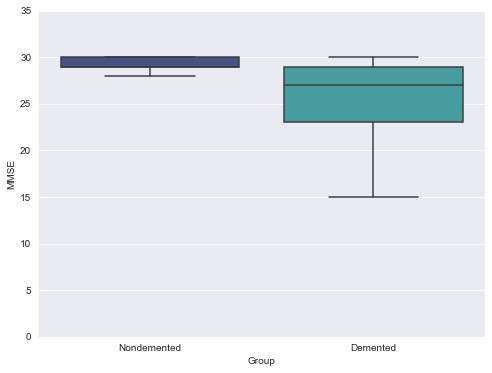

In [27]:
plt.figure ( figsize= (8,6) )
sns.boxplot(x="Group", y="MMSE", data=data1, showfliers = False, palette="mako" ) # without outliers
plt.ylim(0,35)
plt.show ()

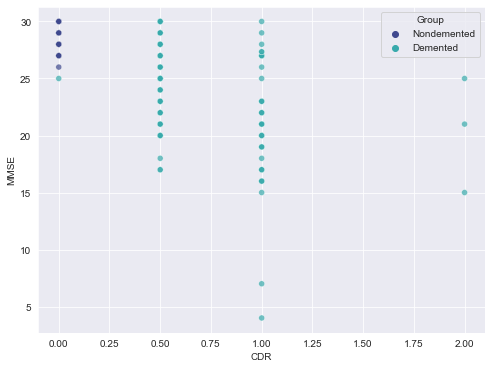

In [28]:
plt.figure ( figsize= (8,6) )
sns.scatterplot(data=data1, x="CDR", y="MMSE", hue="Group", alpha=0.7,palette="mako")
plt.show()

In [101]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="CDR",hue="Group",split=True, data=data1)
plt.show()


ValueError: There must be exactly two hue levels to use `split`.'

<Figure size 864x576 with 0 Axes>

In [100]:
#converting catagorical value to numerical value 
data1['Group'] = data1['Group'].replace(['Nondemented','Demented'], [0,1])
data1['Gender'] = data1['Gender'].replace(['F','M'], [0,1])

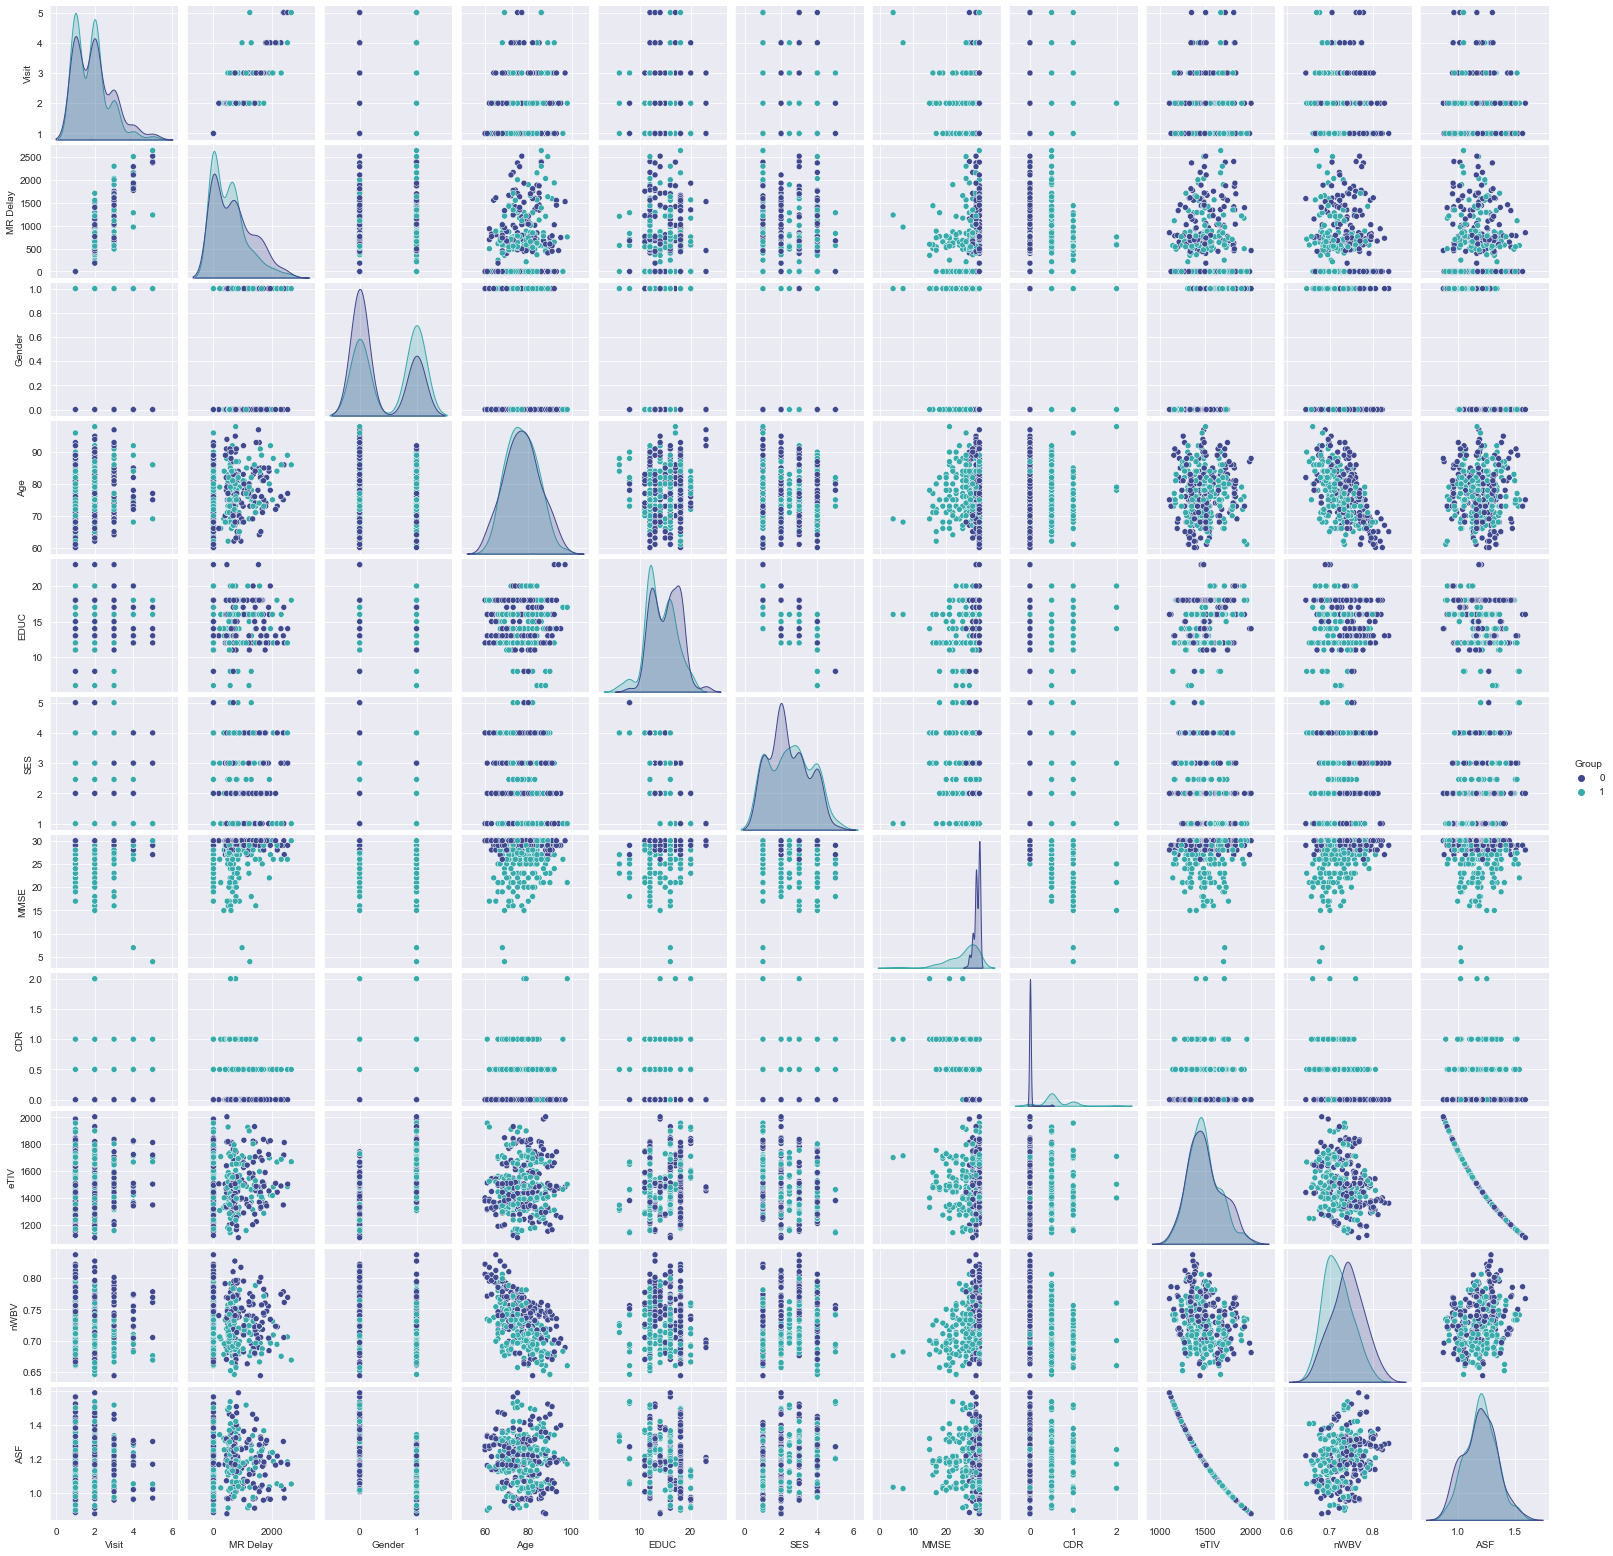

In [53]:
sns.pairplot(data1,hue='Group',size=2,palette='mako')

# Feature section 

In [54]:
X = data1.drop("Group",axis=1)   #Feature Matrix
y = data1["Group"] 

In [55]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((261, 14), (112, 14))

In [56]:
X_train.corr()

,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.930489,0.080257,0.170126,-0.058632,0.043706,0.068733,-0.022461,0.083502,-0.089212,-0.082214
MR Delay,0.930489,1.000000,0.089652,0.179393,-0.025053,0.053831,0.084342,-0.052823,0.098313,-0.102529,-0.097624
Gender,0.080257,0.089652,1.000000,-0.051890,0.125801,-0.119616,-0.091531,0.191484,0.599768,-0.233303,-0.586203
Age,0.170126,0.179393,-0.051890,1.000000,-0.028401,-0.071528,-0.008020,0.032015,0.002220,-0.526961,0.003098
EDUC,-0.058632,-0.025053,0.125801,-0.028401,1.000000,-0.703184,0.235727,-0.118778,0.295166,-0.006029,-0.279516
SES,0.043706,0.053831,-0.119616,-0.071528,-0.703184,1.000000,-0.162486,0.026093,-0.290469,0.115378,0.281080
MMSE,0.068733,0.084342,-0.091531,-0.008020,0.235727,-0.162486,1.000000,-0.677312,0.017769,0.374399,-0.004755
CDR,-0.022461,-0.052823,0.191484,0.032015,-0.118778,0.026093,-0.677312,1.000000,0.036944,-0.388192,-0.043654
eTIV,0.083502,0.098313,0.599768,0.002220,0.295166,-0.290469,0.017769,0.036944,1.000000,-0.150282,-0.988541
nWBV,-0.089212,-0.102529,-0.233303,-0.526961,-0.006029,0.115378,0.374399,-0.388192,-0.150282,1.000000,0.158348


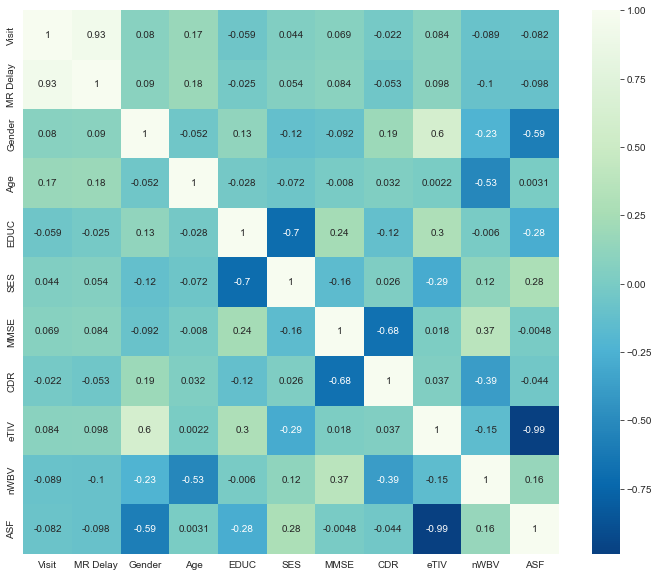

In [37]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu_r)
plt.show()

In [57]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [59]:
corr_features


{'ASF', 'MR Delay', 'SES'}

In [60]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Subject ID,MRI ID,Visit,Gender,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV
45,OAS2_0026,OAS2_0026_MR1,1,1,R,82,12,27.0,0.5,1420,0.713
272,OAS2_0131,OAS2_0131_MR2,2,0,R,67,12,25.0,0.0,1331,0.761
54,OAS2_0029,OAS2_0029_MR2,2,0,R,80,12,30.0,0.0,1390,0.735
236,OAS2_0113,OAS2_0113_MR2,2,0,R,75,13,28.0,0.5,1520,0.708
253,OAS2_0121,OAS2_0121_MR2,2,0,R,74,11,30.0,0.0,1517,0.705
...,...,...,...,...,...,...,...,...,...,...,...
164,OAS2_0076,OAS2_0076_MR2,2,0,R,69,18,29.0,0.0,1536,0.719
301,OAS2_0147,OAS2_0147_MR1,1,0,R,77,13,29.0,0.0,1351,0.769
186,OAS2_0088,OAS2_0088_MR2,2,1,R,80,12,20.0,1.0,1494,0.661
17,OAS2_0010,OAS2_0010_MR1,1,0,R,66,12,30.0,0.5,1447,0.769


In [61]:
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [64]:
feature_cols=['Gender','Age','EDUC', 'MMSE', 'CDR']
X = data1[feature_cols] # Features
y = data1.Group # Target variable

In [65]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.shape, X_test.shape 

((261, 5), (112, 5))

from sklearn.metrics import roc_curve, auc

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Decision Tree classifer

In [66]:
# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_dt.predict(X_test)

In [67]:
print(metrics.confusion_matrix(y_test,y_pred))
# Print a classification report
print(metrics.classification_report(y_test,y_pred))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[[55  5]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.90      0.87      0.88        52

    accuracy                           0.89       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112

Accuracy: 0.8928571428571429


In [68]:
from sklearn.metrics import plot_confusion_matrix

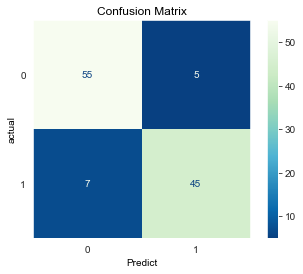

In [69]:
matrix= plot_confusion_matrix(model_dt,X_test,y_test, cmap=plt.cm.GnBu_r )
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

def rocCurve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams["figure.figsize"] = [8,8]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

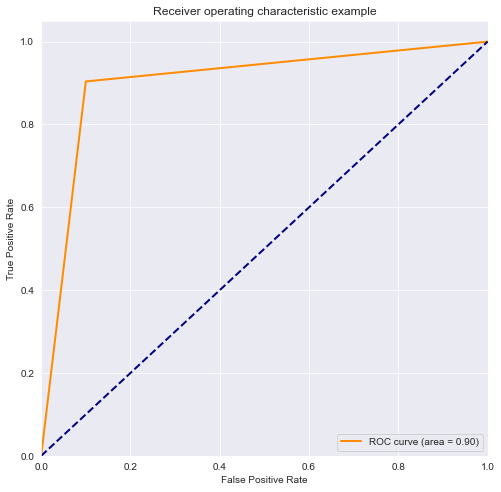

In [127]:
rocCurve(model_dt, X_test, y_test)

# extra

In [71]:
# Create Decision Tree classifer object
model_dt1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_dt1 = model_dt1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_1 = model_dt1.predict(X_test)



In [72]:
print(metrics.confusion_matrix(y_test,y_pred_1))
# Print a classification report
print(metrics.classification_report(y_test,y_pred_1))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_1))

[[60  0]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.87      0.93        52

    accuracy                           0.94       112
   macro avg       0.95      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Accuracy: 0.9375


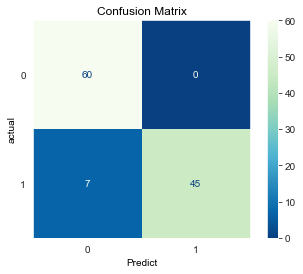

In [73]:
matrix= plot_confusion_matrix(model_dt1,X_test,y_test ,cmap=plt.cm.GnBu_r )
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

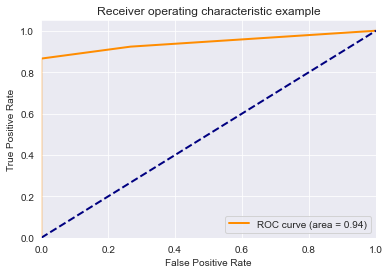

In [74]:
rocCurve(model_dt1, X_test, y_test)

# AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = model_abc.predict(X_test)

In [77]:
print(metrics.confusion_matrix(y_test,y_pred2))
# Print a classification report
print(metrics.classification_report(y_test,y_pred2))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred2))

[[58  2]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.96      0.87      0.91        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.92      0.92      0.92       112

Accuracy: 0.9196428571428571


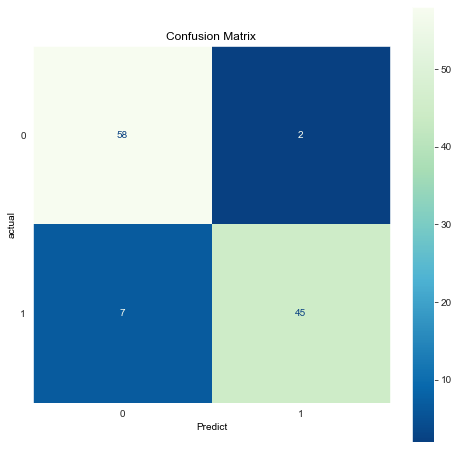

In [78]:
matrix= plot_confusion_matrix(model_abc,X_test,y_test ,cmap=plt.cm.GnBu_r)
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

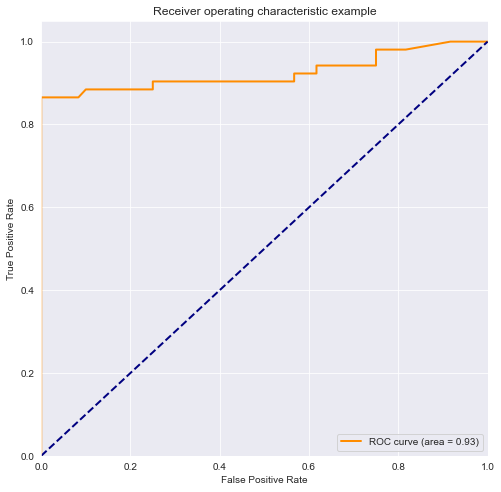

In [79]:
rocCurve(model_abc, X_test, y_test)

# Naive Bayes 

In [80]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predg = gnb.predict(X_test)

In [81]:
print(metrics.confusion_matrix(y_test,y_predg))
# Print a classification report
print(metrics.classification_report(y_test,y_predg))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_predg))

[[60  0]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.87      0.93        52

    accuracy                           0.94       112
   macro avg       0.95      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Accuracy: 0.9375


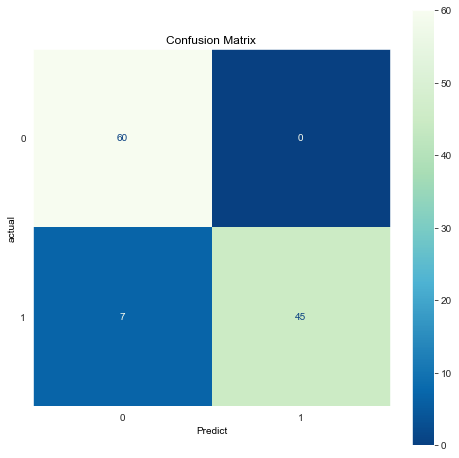

In [82]:
matrix= plot_confusion_matrix(gnb,X_test,y_test,cmap=plt.cm.GnBu_r)
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

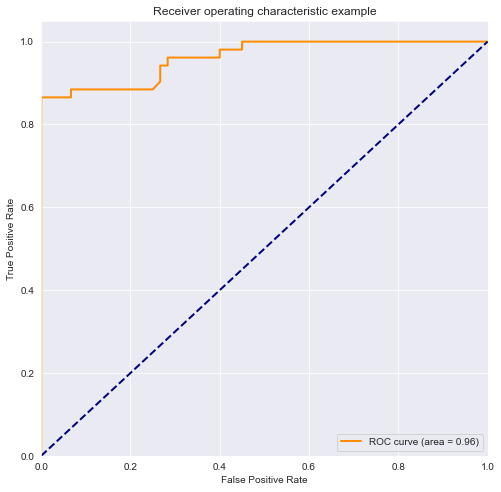

In [83]:
rocCurve(gnb, X_test, y_test)